In [5]:
# Import necessary libraries
import joblib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load the dataset
file_path = r"C:\Users\Hemalatha\Downloads\Credit_Underwriting_Dataset.csv"  # Update with your correct file path
print(f"Loading dataset from: {file_path}")

try:
    dataset = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
    print(dataset.head())  # Display the first few rows
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")


Loading dataset from: C:\Users\Hemalatha\Downloads\Credit_Underwriting_Dataset.csv
Dataset loaded successfully!
   loan_id  applicant_age gender marital_status employee_status  \
0        1             59  Women         Single        employed   
1        2             64    Men         Single   self employed   
2        3             24    Men         Single        employed   
3        4             63    Men        Married   self employed   
4        5             77    Men         Single   self employed   

  residence_type     loan_purpose  income_annum  loan_amount  loan_term  \
0       MORTGAGE          Vehicle       9600000     29900000         12   
1       MORTGAGE         Personal       4100000     12200000          8   
2       MORTGAGE  Home Renovation       9100000     29700000         20   
3            OWN  Home Renovation       8200000     30700000          8   
4           RENT        Education       9800000     24200000         20   

   cibil_score  residential_assets

In [6]:
# Step 3: Explore the dataset
print("\nDataset Info:")
print(dataset.info())
print("\nFirst 5 rows of the dataset:")
print(dataset.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5312 entries, 0 to 5311
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loan_id                   5312 non-null   int64  
 1   applicant_age             5312 non-null   int64  
 2   gender                    5312 non-null   object 
 3   marital_status            5312 non-null   object 
 4   employee_status           5312 non-null   object 
 5   residence_type            5312 non-null   object 
 6   loan_purpose              5312 non-null   object 
 7   income_annum              5312 non-null   int64  
 8   loan_amount               5312 non-null   int64  
 9   loan_term                 5312 non-null   int64  
 10  cibil_score               5312 non-null   int64  
 11  residential_assets_value  5312 non-null   int64  
 12  commercial_assets_value   5312 non-null   int64  
 13  luxury_assets_value       5312 non-null   int64 

In [7]:
# Clean the column names by stripping any leading or trailing spaces
dataset.columns = dataset.columns.str.strip()

# Check if 'loan_status' is now accessible
print("Columns after cleaning:", dataset.columns)

# Now proceed with the rest of the code
X = dataset.drop(columns=['loan_id', 'loan_status'], errors='ignore')  # Features
y = dataset['loan_status']  # Target variable

# Rest of the preprocessing steps...
# Clean the 'loan_interest' and 'loan_percent_income' columns (replace commas and convert to float)
X['loan_interest'] = X['loan_interest'].replace({',': '.'}, regex=True).astype(float)
X['loan_percent_income'] = X['loan_percent_income'].replace({',': '.'}, regex=True).astype(float)

# Encode categorical features
categorical_columns = ['gender', 'marital_status', 'employee_status', 'residence_type', 'loan_purpose']
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Check for missing values
missing_values = dataset.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)

Columns after cleaning: Index(['loan_id', 'applicant_age', 'gender', 'marital_status',
       'employee_status', 'residence_type', 'loan_purpose', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_interest', 'loan_percent_income', 'active_loans', 'loan_status'],
      dtype='object')

Missing Values in Each Column:
loan_id                     0
applicant_age               0
gender                      0
marital_status              0
employee_status             0
residence_type              0
loan_purpose                0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_interest               0
loan_percent_income         0
active_loans                0
loan_stat

In [8]:
# Step 5: Split the dataset into training and testing sets
print("\nSplitting the dataset into training and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Splitting the dataset into training and test sets...


In [9]:
# Step 6: Train Random Forest and Gradient Boosting models
print("\nTraining Random Forest model...")
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

print("\nTraining Gradient Boosting model...")
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)


Training Random Forest model...

Training Gradient Boosting model...


GradientBoostingClassifier(random_state=42)

In [10]:
# Step 7: Create an ensemble model using VotingClassifier
print("\nCreating an ensemble model with Random Forest and Gradient Boosting...")
ensemble_model = VotingClassifier(
    estimators=[
        ('Random Forest', rf_model),
        ('Gradient Boosting', gb_model)
    ],
    voting='soft'  # Use probabilities for predictions
)

# Train the ensemble model
print("\nTraining the ensemble model...")
ensemble_model.fit(X_train, y_train)


Creating an ensemble model with Random Forest and Gradient Boosting...

Training the ensemble model...


VotingClassifier(estimators=[('Random Forest',
                              RandomForestClassifier(random_state=42)),
                             ('Gradient Boosting',
                              GradientBoostingClassifier(random_state=42))],
                 voting='soft')

In [11]:
# Step 8: Evaluate the ensemble model
print("\nEvaluating the ensemble model...")
ensemble_pred = ensemble_model.predict(X_test)
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
ensemble_report = classification_report(y_test, ensemble_pred, target_names=["Rejected", "Approved"])

# Print the results
print("\nEnsemble Model Accuracy:", ensemble_accuracy)
print("\nClassification Report:\n", ensemble_report)


Evaluating the ensemble model...

Ensemble Model Accuracy: 0.993414863593603

Classification Report:
               precision    recall  f1-score   support

    Rejected       1.00      0.99      0.99       544
    Approved       0.99      1.00      0.99       519

    accuracy                           0.99      1063
   macro avg       0.99      0.99      0.99      1063
weighted avg       0.99      0.99      0.99      1063



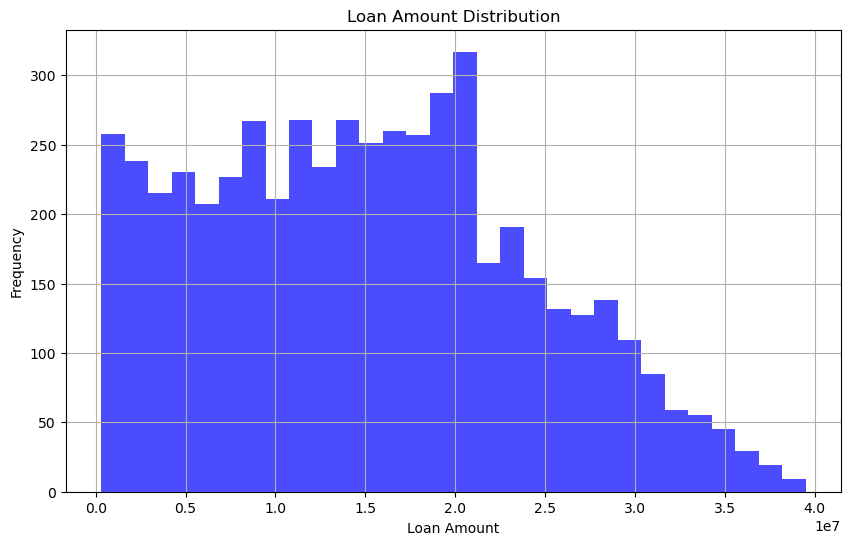

In [12]:
# Plotting the distribution of loan amounts
plt.figure(figsize=(10, 6))
plt.hist(dataset['loan_amount'], bins=30, color='blue', alpha=0.7)
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
     

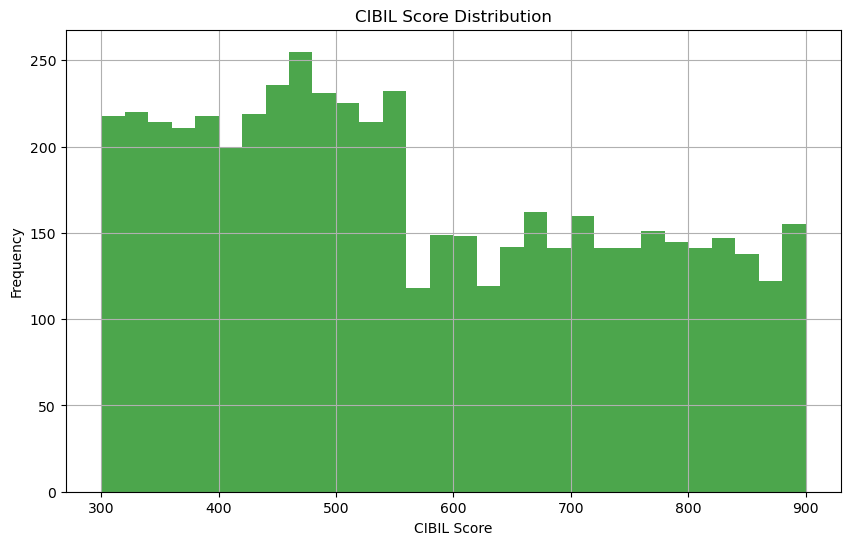

In [13]:
# Plotting the distribution of CIBIL scores
plt.figure(figsize=(10, 6))
plt.hist(dataset['cibil_score'], bins=30, color='green', alpha=0.7)
plt.title('CIBIL Score Distribution')
plt.xlabel('CIBIL Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
     

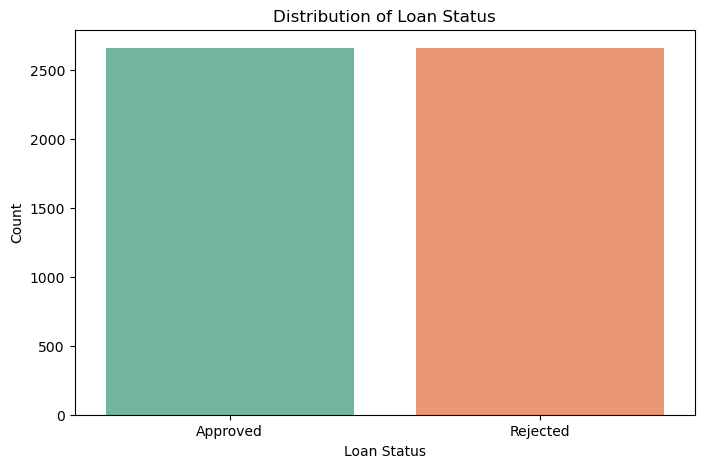

In [14]:
# Plotting a countplot for 'loan_status' to check the distribution of approval status
plt.figure(figsize=(8, 5))
sns.countplot(data=dataset, x='loan_status', palette='Set2')
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

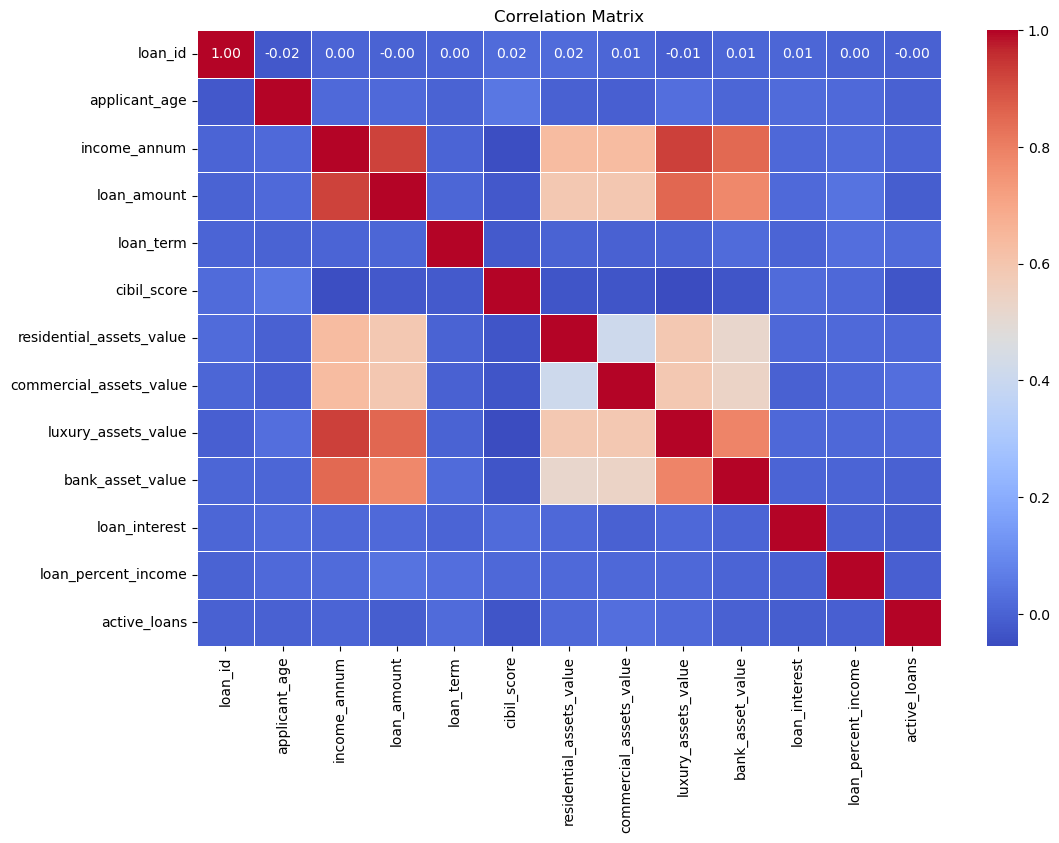

In [15]:
# Select only numeric columns for the correlation matrix
numeric_columns = dataset.select_dtypes(include=['number']).columns

# Compute the correlation matrix for numeric columns
correlation_matrix = dataset[numeric_columns].corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
